# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle


# TODO: Fill this in based on where you saved the training and testing data

training_file = "data/train.p"
validation_file= "data/valid.p"
testing_file = "data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

#remove before release#
print (len(X_train))
print (len(X_valid))
print (len(X_test))

print (len(set(y_train)))

34799
4410
12630
43


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))


# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

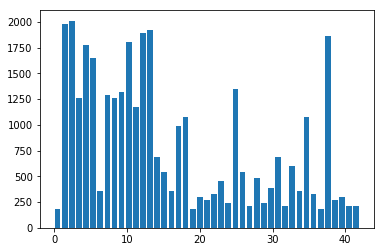

Most common traffic sign in dataset


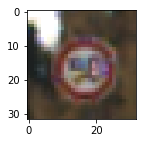

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
import itertools
import operator

%matplotlib inline

def most_common(L):
    # get an iterable of (item, iterable) pairs
    SL = sorted((x, i) for i, x in enumerate(L))
    # print 'SL:', SL
    groups = itertools.groupby(SL, key=operator.itemgetter(0))
# auxiliary function to get "quality" for an item
    def _auxfun(g):
        item, iterable = g
        count = 0
        min_index = len(L)
        for _, where in iterable:
            count += 1
            min_index = min(min_index, where)
            #print ('item %r, count %r, minind %r' % (item, count, min_index))
        return count, -min_index
# pick the highest-count/earliest item
    return max(groups, key=_auxfun)[0]



# histogram of label frequency
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.8 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

#index = random.randint(0, len(X_train)) remove random, show the max
index = np.where(y_train==most_common(y_train))

image = X_train[index[0][0]+1].squeeze()

print ("Most common traffic sign in dataset")
plt.figure(figsize=(2,2))
plt.imshow(image)





----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)


## Normalize the train and test datasets 

print(np.mean(X_train))
print(np.mean(X_test))

#X_train = (X_train - X_train.mean()) / (np.max(X_train) - np.min(X_train))
#X_test = (X_test - X_test.mean()) / (np.max(X_test) - np.min(X_test))
###!!!!!!!!!!!!!!
# Normalization turned off as it was not helping


82.677589037
82.1484603612


### Model Architecture

In [5]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten
import tensorflow as tf

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.01
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

# Training rate
rate = 0.0005

logits = LeNet(x)
predictions = tf.nn.softmax(logits)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples



### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

Training...

EPOCH 1 ...
Training Accuracy = 0.445
Validation Accuracy = 0.399

EPOCH 2 ...
Training Accuracy = 0.756
Validation Accuracy = 0.684

EPOCH 3 ...
Training Accuracy = 0.862
Validation Accuracy = 0.785

EPOCH 4 ...
Training Accuracy = 0.907
Validation Accuracy = 0.837

EPOCH 5 ...
Training Accuracy = 0.936
Validation Accuracy = 0.870

EPOCH 6 ...
Training Accuracy = 0.946
Validation Accuracy = 0.846

EPOCH 7 ...
Training Accuracy = 0.963
Validation Accuracy = 0.867

EPOCH 8 ...
Training Accuracy = 0.967
Validation Accuracy = 0.859

EPOCH 9 ...
Training Accuracy = 0.970
Validation Accuracy = 0.878

EPOCH 10 ...
Training Accuracy = 0.980
Validation Accuracy = 0.891

EPOCH 11 ...
Training Accuracy = 0.978
Validation Accuracy = 0.877

EPOCH 12 ...
Training Accuracy = 0.980
Validation Accuracy = 0.878

EPOCH 13 ...
Training Accuracy = 0.989
Validation Accuracy = 0.889

EPOCH 14 ...
Training Accuracy = 0.986
Validation Accuracy = 0.882

EPOCH 15 ...
Training Accuracy = 0.992
Valid

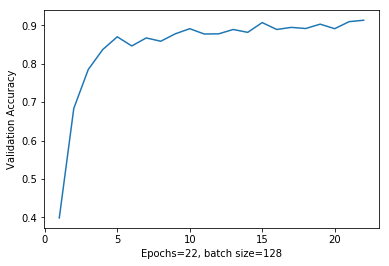

In [6]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.



# started with 10 and got accuracy of 0.871 which is not good
# with epochs 15 I get 0.885, still not good. Will tweak batch_size
# with batch size 256 I get 0.872 accuracy which is lower than 0.885
# reset epochs = 10 and batch size = 128
EPOCHS = 22
BATCH_SIZE = 128

accuracy_plot=[]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        accuracy_plot=np.append(accuracy_plot,validation_accuracy)
        
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")
    plt.plot(np.linspace(1,EPOCHS,EPOCHS),accuracy_plot)
    plt.xlabel('Epochs=' + str(EPOCHS) + ', batch size=' + str(BATCH_SIZE))
    plt.ylabel ('Validation Accuracy')
    plt.show()
    
    

In [7]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.907


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

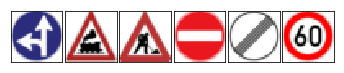

(6, 32, 32, 3)


In [8]:
import glob
from scipy import misc
from PIL import Image

filename = (glob.glob('./web/*.png')) 
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(len(filename)):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    img1 = misc.imread(filename[i],flatten=False)
    img2 = (np.array(misc.imresize(img1,(32,32,3))))
    if (i == 0) :
        web_images = np.array([img2])
    else:
        img3= np.array([img2])
        web_images=np.append(web_images,img3,axis=0)
    ax.imshow(img2,cmap='gray')
plt.show()
#temp1 = (np.sum(web_images/3, axis=3, keepdims=True))
#web_images=temp1
print(web_images.shape)

### Predict the Sign Type for Each Image

In [9]:
### Calculate the accuracy for these 6 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    web_predictions = sess.run(predictions, feed_dict={x: web_images})
    print(sess.run(tf.argmax(web_predictions,1)))
    
    
    


[37 20 11 17 32  2]


### Analyze Performance

In [10]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

web_labels = [37, 43, 25, 17, 32, 3 ]

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(web_images, web_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.500


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [11]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

import pandas as pd
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    #web_predictions = sess.run(predictions, feed_dict={x: web_images})
    k=(sess.run(tf.nn.top_k(predictions, 5), feed_dict={x: web_images}))
print (k)

sign_names = pd.read_csv("signnames.csv")
print (sign_names)


for i in range(len(k.indices)):
    print('Image:', i+1)
    for j in range(len(k.indices[0])):
        print ('Probabilty:', k.values[i,j] , 'Prediction:', sign_names.iloc[k.indices[i,j],1] )
    print('------------------------------------')
    

TopKV2(values=array([[  1.00000000e+00,   6.97795991e-15,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  9.99542117e-01,   2.83608824e-04,   1.73826687e-04,
          4.85086389e-07,   1.49301052e-08],
       [  1.00000000e+00,   7.68818928e-13,   1.01726827e-14,
          1.03805592e-15,   3.26071326e-22],
       [  1.00000000e+00,   6.74466394e-09,   1.98258940e-20,
          7.33228647e-21,   2.21429394e-22],
       [  9.78971601e-01,   2.10056938e-02,   2.25987133e-05,
          4.16842125e-14,   2.11962414e-15],
       [  9.99948978e-01,   5.10352875e-05,   1.33654110e-08,
          4.15806859e-16,   2.13067428e-21]], dtype=float32), indices=array([[37, 40,  0,  1,  2],
       [20,  9, 26, 28, 10],
       [11, 28, 25, 30, 23],
       [17, 14, 11, 26,  0],
       [32,  6, 41, 42, 12],
       [ 2,  1,  5,  3, 12]], dtype=int32))
    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1   

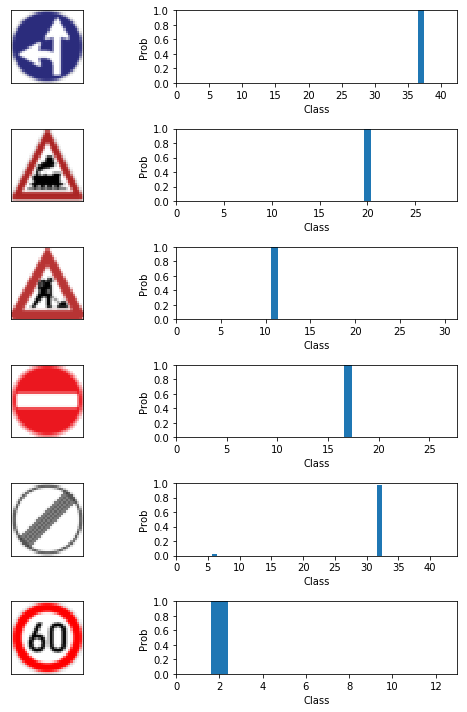

In [12]:

fig = plt.figure(figsize=(8,10))
for i in np.arange(k.values.shape[0]):
    ax = fig.add_subplot(k.values.shape[0],2, 2*(i + 1)-1,xticks=[],yticks=[])
    ax.imshow(web_images[i].squeeze(),cmap='gray')
    ax = fig.add_subplot(k.values.shape[0],2, 2*(i + 1))
    x=k.indices[i]
    y=k.values[i]
    ax.bar(x,y,align='center')
    ax.set_xlim (left=0)
    ax.set_ylim (bottom=0,top=1)
    ax.set_yticks(np.arange(0,1.1,0.2))
    ax.set_xlabel('Class')
    ax.set_ylabel('Prob')
plt.tight_layout()
plt.show()

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 